In [1]:
import tensorflow as tf
from tensorflow import keras

# Print TensorFlow version
print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.13.0


In [2]:
import pandas as pd

# Load the Wine Quality dataset

wine_data = pd.read_csv("wine.csv")

# Explore dimensions
print(f"Dataset dimensions: {wine_data.shape}")
print(wine_data.head())


Dataset dimensions: (1599, 12)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol quality  
0      9.4     bad  
1      9.8   

In [3]:
# Check for null values
print(wine_data.isnull().sum())

# Identify categorical variables (assuming 'quality' is categorical)
categorical_vars = ['quality']

# Encode categorical variables
wine_data_encoded = pd.get_dummies(wine_data, columns=categorical_vars)

print(wine_data_encoded.head())


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.2

In [6]:
# Separate features and target variable
X = wine_data_encoded.drop(columns=['quality_good'])
y = wine_data_encoded['quality_good']

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (1599, 12)
Target shape: (1599,)


In [7]:
from sklearn.model_selection import train_test_split

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Train set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)


Train set: (1279, 12) (1279,)
Validation set: (160, 12) (160,)
Test set: (160, 12) (160,)


In [8]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform on training data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [9]:
# Import necessary layers from Keras
from keras.models import Sequential
from keras.layers import Dense

# Define model architecture
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary output layer


In [10]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9985 (39.00 KB)
Trainable params: 9985 (39.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [12]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
# Fit the model to the training data
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_val_scaled, y_val))


Epoch 1/50
40/40 [==============================] - 1s 9ms/step - loss: 0.3918 - accuracy: 0.8960 - val_loss: 0.1748 - val_accuracy: 0.9812
Epoch 2/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0727 - accuracy: 0.9961 - val_loss: 0.0266 - val_accuracy: 1.0000
Epoch 3/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0134 - accuracy: 1.0000 - val_loss: 0.0079 - val_accuracy: 1.0000
Epoch 4/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 5/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 6/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 7/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 8/50
40/40 [==

In [14]:
# Get the model's parameters
model_params = model.get_weights()
print("Model parameters (weights and biases):")
for layer in model_params:
    print(layer.shape)


Model parameters (weights and biases):
(12, 128)
(128,)
(128, 64)
(64,)
(64, 1)
(1,)


In [15]:
import pandas as pd

# Convert the training history to a DataFrame
history_df = pd.DataFrame(history.history)
print(history_df.head())


       loss  accuracy  val_loss  val_accuracy
0  0.391819  0.896012  0.174850       0.98125
1  0.072660  0.996091  0.026559       1.00000
2  0.013429  1.000000  0.007864       1.00000
3  0.005095  1.000000  0.003920       1.00000
4  0.002744  1.000000  0.002360       1.00000


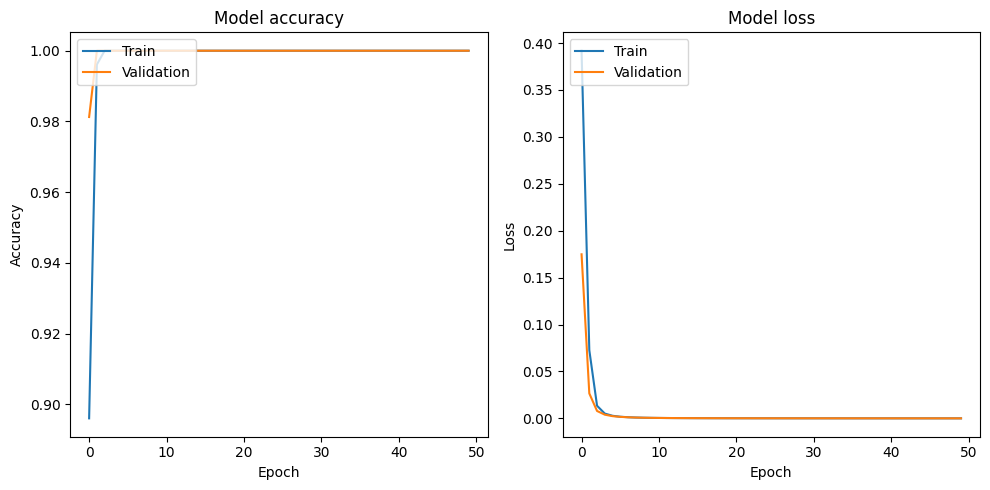

In [16]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(10, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [17]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


5/5 [==============================] - 0s 2ms/step - loss: 1.3467e-05 - accuracy: 1.0000
Test Loss: 1.3467203643813264e-05
Test Accuracy: 1.0
